### Matplotlib and Seaborn

Visualizing data is crucial in data analysis to uncover patterns, trends, and insights. Matplotlib and Seaborn are two of the most widely used Python libraries for this task.

- What is Matplotlib?
  - `matplotlib` is a foundational, low-level plotting library for Python, providing fine control over every element of a plot.

  - It is open source and integrates closely with `numpy` and `pandas`.

  - It is highly customizable and suitable for basic to highly complex visualizations, including 2D and some 3D plots.

  - The primary interface is `pyplot`, which mimics MATLAB's style and syntax.​

- What is Seaborn?
   - `seaborn` is built on top of Matplotlib and offers a high-level interface for drawing attractive and informative statistical graphics.

   - It integrates seamlessly with pandas DataFrames and includes built-in themes, color palettes, and statistical plotting functions.

   - `seaborn` is ideal for quick, beautiful exploratory data analysis (EDA) and works especially well for grouped or relational data.

#### Key Properties and Characteristics

| Feature          | Matplotlib                                 | Seaborn                                      |
|------------------|--------------------------------------------|----------------------------------------------|
| Level            | Low-level: detailed control, verbose       | High-level: succinct, easy to use             |
| Customization    | Extremely flexible; everything can be tweaked | Good default aesthetics; less fine-tuning     |
| Style            | Utilitarian by default; manual styling needed | Stylish by default; built-in color palettes   |
| Complex Plots    | Requires more code for statistical plots   | Built-in support for complex statistical plots|
| Integration      | Supports arrays and pandas                  | Native integration with pandas DataFrames     |
| Use Cases       | Publication-quality, custom visualizations | Exploration, statistical visualizations       |


#### Let's Explore All Kinds of Charts

- Here this code generate a synthetic dataset contains features such as `Age`, `Salary`, `YearsExperience`, `Department`, `EducationLevel`, & `IsManager`. We will use this data to explore all kinds of charts.

In [1]:
import numpy as np
import pandas as pd

def generate_dataset(num_samples=200, seed=123):
    np.random.seed(seed)

    # Numeric continuous features
    age = np.random.randint(18, 70, size=num_samples)  # Age in years
    salary = np.random.normal(loc=60000, scale=15000, size=num_samples).astype(int)  # Annual salary in USD
    years_experience = np.clip(np.random.normal(loc=10, scale=5, size=num_samples), 0, None).astype(int)  # Years of experience

    # Categorical features
    departments = ['HR', 'IT', 'Finance', 'Marketing', 'Sales']
    department = np.random.choice(departments, size=num_samples)

    education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
    education = np.random.choice(education_levels, size=num_samples, p=[0.2, 0.5, 0.25, 0.05])

    # Target / label - e.g., whether employee is a manager (binary)
    is_manager = (years_experience > 8) & (salary > 65000)
    is_manager = is_manager.astype(int)

    # Build DataFrame
    df = pd.DataFrame({
        'Age': age,
        'Salary': salary,
        'YearsExperience': years_experience,
        'Department': department,
        'EducationLevel': education,
        'IsManager': is_manager
    })

    return df

# Example usage
df = generate_dataset()
df.head()

,Age,Salary,YearsExperience,Department,EducationLevel,IsManager
0,63,73962,17,IT,Master,1
1,20,60695,9,IT,Master,0
2,46,80051,6,HR,High School,0
3,52,64203,4,Finance,Bachelor,0
4,56,82449,10,Finance,Bachelor,1


In [2]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### 1. Bar Chart (Vertical)

- **Definition**: Vertical bars represent values for categorical data.

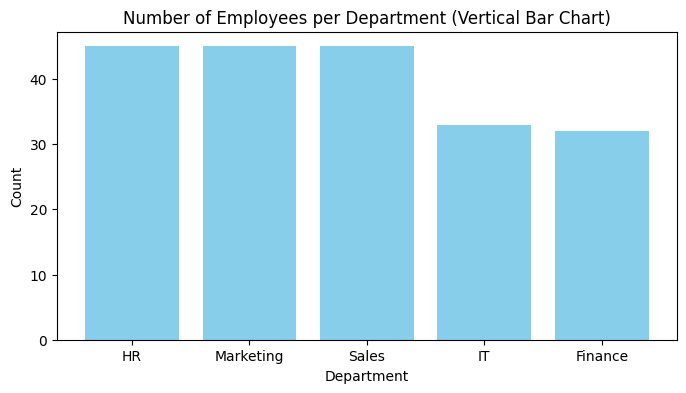

In [3]:
import matplotlib.pyplot as plt
data = df['Department'].value_counts()
plt.figure(figsize=(8,4))
plt.bar(data.index, data.values, color='skyblue')
plt.title('Number of Employees per Department (Vertical Bar Chart)')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

#### 2. Bar Chart (Horizontal)

- **Definition**: Horizontal bars show categorical data values, beneficial for long labels.

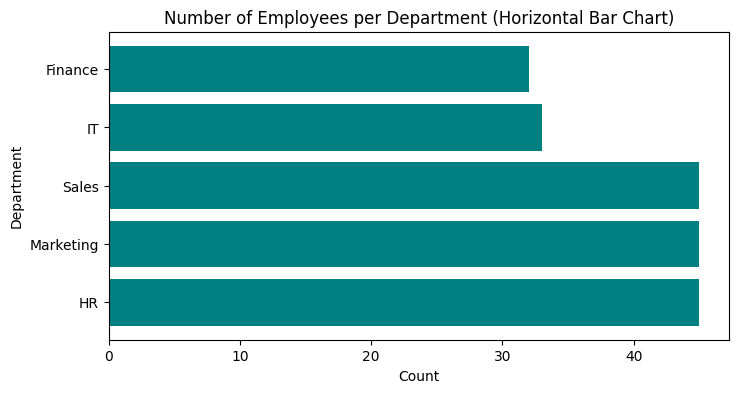

In [4]:
plt.figure(figsize=(8,4))
plt.barh(data.index, data.values, color='teal')
plt.title('Number of Employees per Department (Horizontal Bar Chart)')
plt.ylabel('Department')
plt.xlabel('Count')
plt.show()

#### 3. Stacked Bar Chart (Vertical)

- **Definition**: Bars divided vertically into segments representing sub-categories.

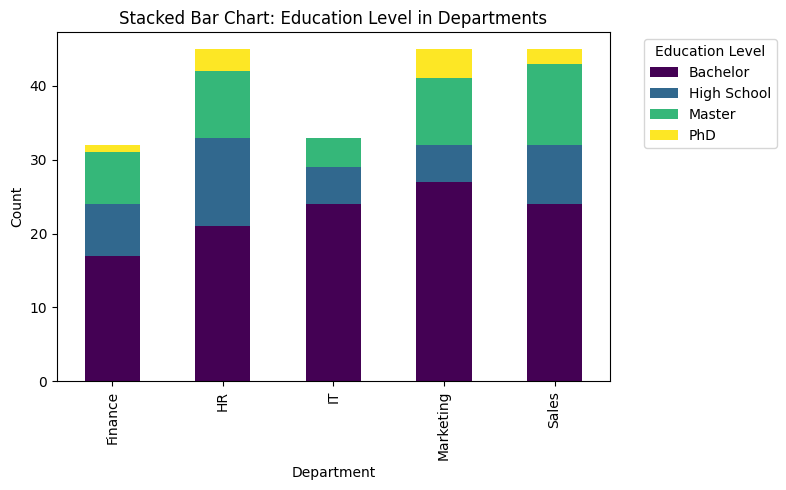

In [5]:
ct = pd.crosstab(df['Department'], df['EducationLevel'])
ct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')
plt.title('Stacked Bar Chart: Education Level in Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Q. What is a Stacked Bar Chart?

A `stacked` bar chart is an extension of a basic bar chart that shows two categorical variables simultaneously. Each bar represents a category from the first variable (like 'Department'), and is divided into segments stacked on top of each other, where each segment corresponds to a category of the second variable (like 'Education Level').

This means instead of separate bars for each education level per department, all levels are stacked in one bar, helping you see both  the total counts per department and the composition of education levels within those totals.

#### 4. Stacked Bar Chart (Horizontal)

- **Definition**: Horizontal stacked bars split by sub-categories.

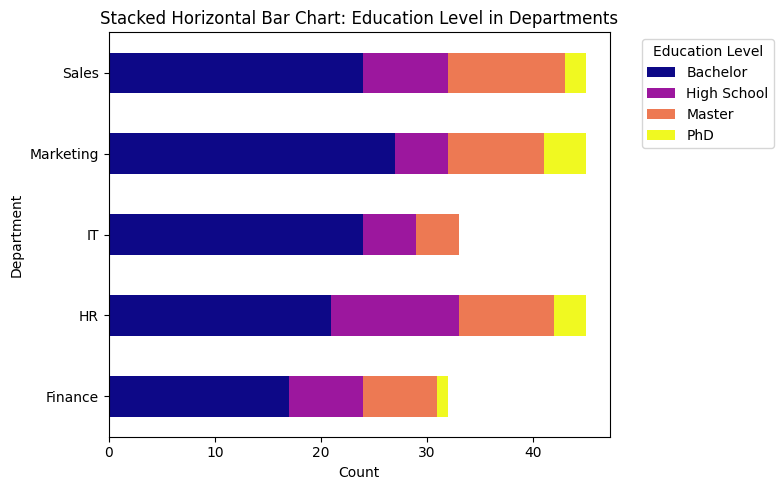

In [6]:
ct.plot(kind='barh', stacked=True, figsize=(8,5), colormap='plasma')
plt.title('Stacked Horizontal Bar Chart: Education Level in Departments')
plt.ylabel('Department')
plt.xlabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 5. Histogram (Vertical)

- **Definition**: Distribution of numeric data shown as frequency bars.

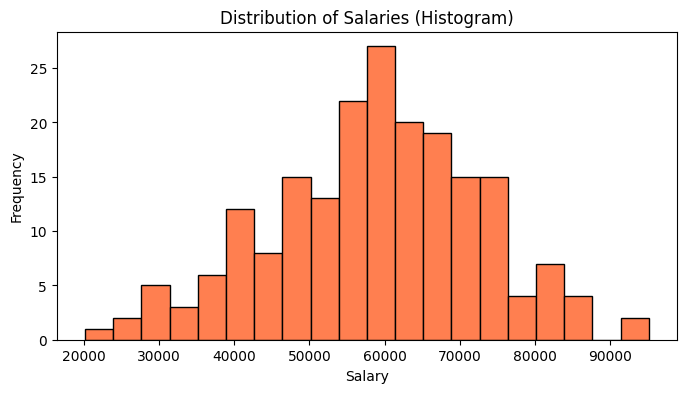

In [7]:
plt.figure(figsize=(8,4))
plt.hist(df['Salary'], bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Salaries (Histogram)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

#### 6. Histogram (Horizontal)

- **Definition**: Horizontal version of histogram for numeric data distribution.

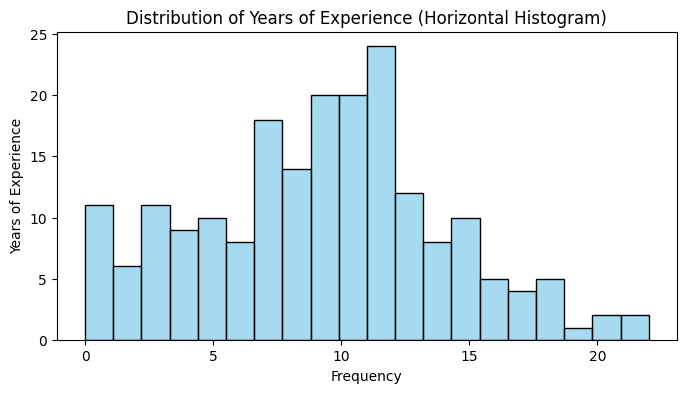

In [8]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.histplot(df['YearsExperience'], bins=20, color='skyblue', kde=False, orientation='horizontal')
plt.title('Distribution of Years of Experience (Horizontal Histogram)')
plt.xlabel('Frequency')
plt.ylabel('Years of Experience')
plt.show()

Q. How to understanding the difference between `Histograms` and `Bar` plots?

1. `Bar` Chart

  - Bar charts display categorical data as separate bars.

  - Each bar's height (or length) shows the count or value for that category.

  - Bars are separated by gaps because categories are discrete.

  - Example: Number of employees in different departments.

2. `Histogram`
  - Histograms visualize the distribution of numeric continuous data.

  - The data range is divided into adjacent intervals called bins, and bars represent frequencies in these bins.

  - Unlike bar charts, histogram bars touch each other because the data is continuous.

  - Example: Distribution of years of experience among employees.

#### 7. Scatterplot

- **Definition**: Plots points for two numerical variables to explore relationships.

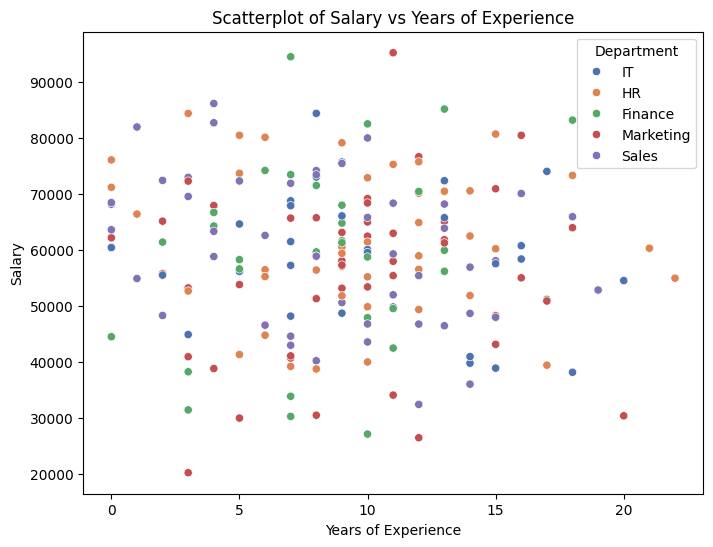

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='YearsExperience', y='Salary', hue='Department', palette='deep')
plt.title('Scatterplot of Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### 8. Pie Chart

- **Definition**: Circular chart showing proportions of categories as slices.

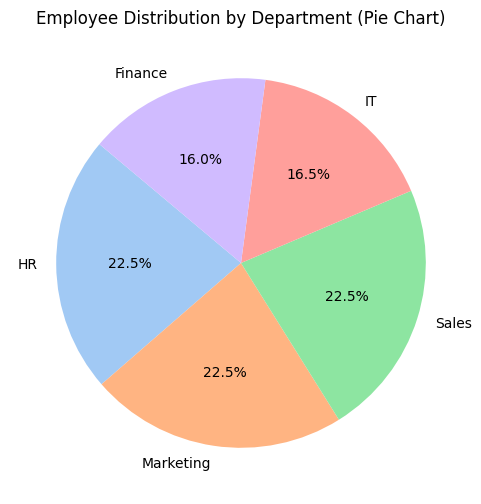

In [10]:
plt.figure(figsize=(6,6))
dep_counts = df['Department'].value_counts()
plt.pie(dep_counts, labels=dep_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Employee Distribution by Department (Pie Chart)')
plt.show()

#### 9. Boxplot (Box-and-Whisker Plot)

- **Definition**: Visualizes data distribution through medians, quartiles, and outliers.

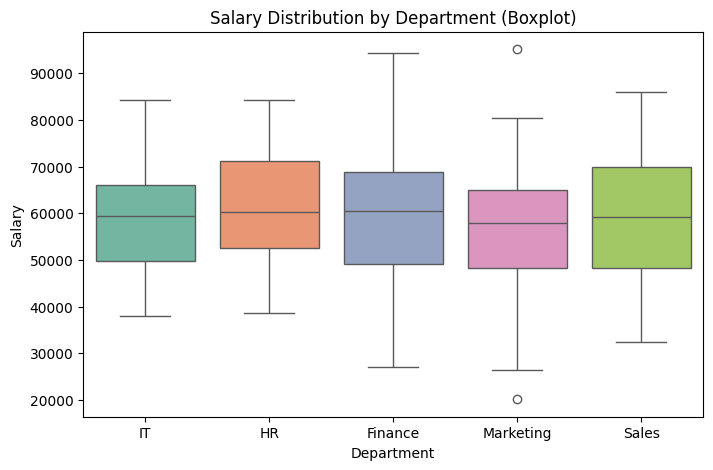

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Department', y='Salary', palette='Set2')
plt.title('Salary Distribution by Department (Boxplot)')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

**NOTE**: In the marketing department's boxplot, small circles represent `outliers`—these are individual salary data points that lie significantly outside the typical range of salaries within the department. The box encapsulates the middle 50% of salaries, while the whiskers extend to values within 1.5 times the interquartile range; any points beyond this range are marked as outliers with small circles. These outlier salaries indicate unusually high or low earnings compared to most employees in marketing, highlighting potential exceptional cases or data variability.

#### 10. Bubble Plot
- Definition: Scatterplot with bubble size representing a third numeric variable.

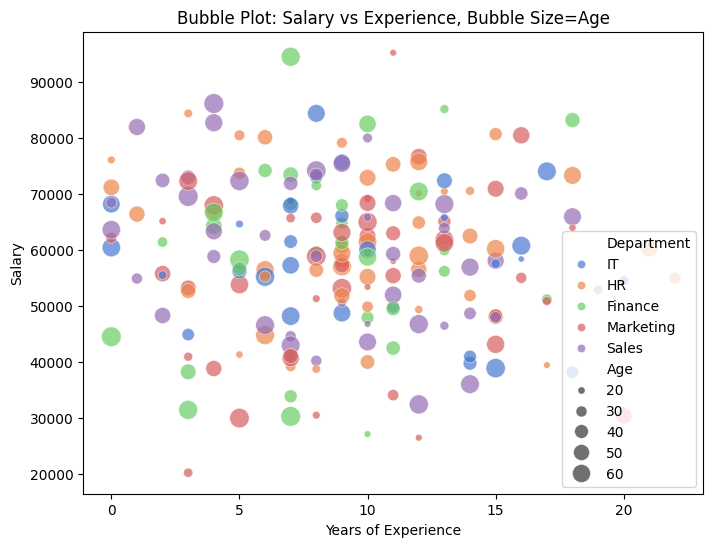

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='YearsExperience', y='Salary', size='Age', hue='Department', sizes=(20, 200), alpha=0.7, palette='muted')
plt.title('Bubble Plot: Salary vs Experience, Bubble Size=Age')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### Task: Department-wise Salary Distribution and Managerial Status

- Create a boxplot showing the salary distribution for each department.
- Overlay or color the data points by managerial status (IsManager) to observe how salaries differ for managers and non-managers within departments.
- Summarize any differences in salary spread and median values among departments and between managerial groups

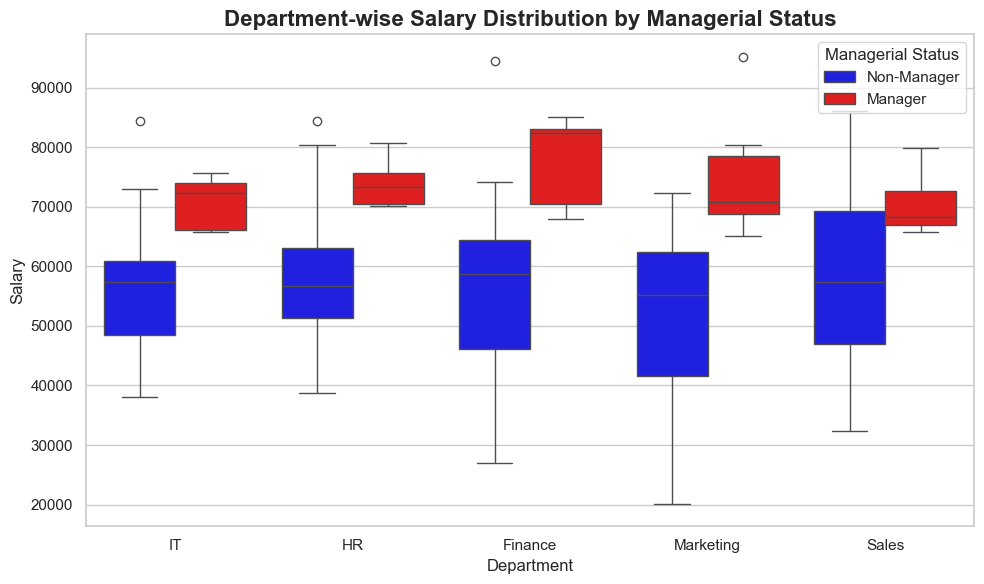

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Department', y='Salary', hue='IsManager',
                 palette={0: 'blue', 1: 'red'})


plt.title('Department-wise Salary Distribution by Managerial Status', fontsize=16, weight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Salary', fontsize=12)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Non-Manager', 'Manager'], title='Managerial Status', loc='upper right')

plt.tight_layout()
plt.show()